In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.run_model as rm
import cortico_cereb_connectivity.globals as gl
import matplotlib.pyplot as plt

In [2]:
method = 'NNLS'
train_ds_list = gl.get_ldo_names()
train_ds_list = [ds_code.replace('Ht', '') if 'Ht' in ds_code else ds_code for ds_code in train_ds_list]
eval_ds_list = gl.datasets
eval_ds_names = [ds if gl.sessions[i] == 'all' else ds + gl.sessions[i].split('-')[1] for i, ds in enumerate(gl.datasets)]
df_all = pd.DataFrame()
for i, (ds_code, ds_eval) in enumerate(zip(train_ds_list, eval_ds_names)):
    df = rm.comb_eval(models=[ds_code+"-global-Cavg"],methods=[method],eval_data=[ds_eval],cerebellum='MNISymC3')
    df_all = pd.concat([df_all, df], ignore_index=True)
df_all['logalpha'] = df_all['logalpha'].fillna(-2)

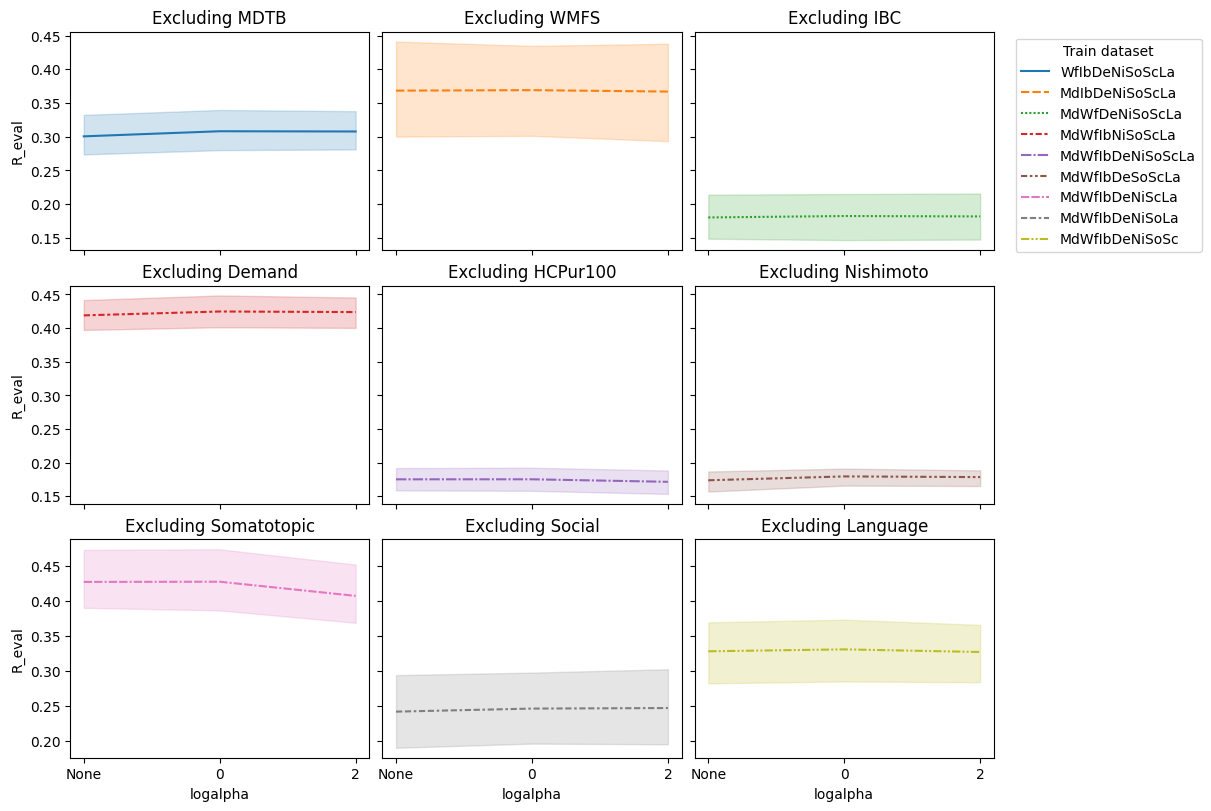

In [3]:
fig, axes = plt.subplots(np.ceil(len(eval_ds_list) / 3).astype(int), 3, figsize=(12, 8), sharey='row', sharex='col', constrained_layout=True)
for i,ed in enumerate(eval_ds_list):
    # Left subplot
    ax = axes[i // 3, i % 3]
    df_to_plot = df_all[(df_all.eval_dataset==ed) & ((df_all.train_dataset!=ed)
                                                     | (df_all.model.str.contains('loo')))]
    sns.lineplot(data=df_to_plot, y='R_eval', x='logalpha', hue='train_dataset', style='train_dataset',
                     hue_order=train_ds_list, style_order=train_ds_list, ax=ax)
    ax.set_title(f'Excluding {ed}')

    if i == 2:
        ax.legend(title='Train dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.legend_.remove()

# Remove extra subplots if more than len(eval_ds_list)
if len(eval_ds_list) < axes.size:
    for j in range(len(eval_ds_list), axes.size):
        fig.delaxes(axes.flatten()[j])

for ax in axes.flatten()[:len(eval_ds_list)]:
    ax.set_xticks([-2, 0, 2])
    ax.set_xticklabels(['None', '0', '2'])

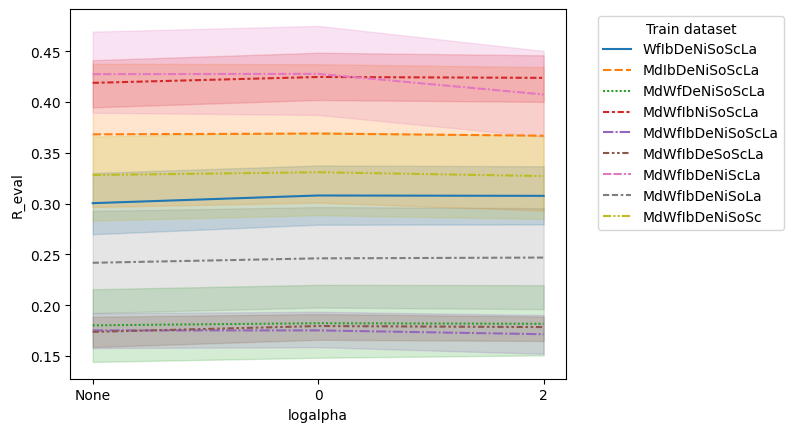

In [4]:
sns.lineplot(data=df_all, y='R_eval', x='logalpha',
             hue='train_dataset', style='train_dataset',
             hue_order=train_ds_list, style_order=train_ds_list)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Train dataset')
plt.xticks([-2, 0, 2], ['None', '0', '2']);

In [5]:
A = pd.pivot_table(df_all, index=['train_dataset'],columns=['logalpha'],values=['R_eval'],aggfunc='mean').reindex(train_ds_list)
display(A)
B = np.nan_to_num(A.values)
ind = B.argmax(axis=1)
log_a = np.array(A.columns.get_level_values(1)[ind])
bestla = pd.DataFrame(log_a,index=A.index,columns=['best_logalpha'])
display(bestla)
df_all['isbest'] = df_all.logalpha.values == bestla.loc[df_all.train_dataset].values.flatten()

R_eval                    
logalpha              -2.0       0.0       2.0
train_dataset                                 
WfIbDeNiSoScLa    0.300513  0.308079  0.307723
MdIbDeNiSoScLa    0.368281  0.369002  0.366905
MdWfDeNiSoScLa    0.180266  0.182371  0.181800
MdWfIbNiSoScLa    0.418919  0.424716  0.423860
MdWfIbDeNiSoScLa  0.175261  0.175300  0.171527
MdWfIbDeSoScLa    0.173820  0.179573  0.178564
MdWfIbDeNiScLa    0.427487  0.427773  0.407485
MdWfIbDeNiSoLa    0.241842  0.246207  0.246983
MdWfIbDeNiSoSc    0.328203  0.330947  0.327197

,best_logalpha
train_dataset,
WfIbDeNiSoScLa,0.0
MdIbDeNiSoScLa,0.0
MdWfDeNiSoScLa,0.0
MdWfIbNiSoScLa,0.0
MdWfIbDeNiSoScLa,0.0
MdWfIbDeSoScLa,0.0
MdWfIbDeNiScLa,0.0
MdWfIbDeNiSoLa,2.0
MdWfIbDeNiSoSc,0.0
